In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import Counter, defaultdict
from nltk.corpus import wordnet as wn


In [ ]:
import os

In [ ]:
from collections import Counter

def get_counter_from_dependency_list(dep_list):
    return Counter(dep_list)


In [ ]:
source_file_path = '/content/drive/My Drive/booknlp_output/alice_BNLP/tori/TORI_alice.supersense'
output_directory = '/content/drive/My Drive/TORI_wordnet/alice'

# Make sure the output directory exists
os.makedirs(output_directory, exist_ok=True)
word_counter= Counter()

with open(source_file_path, 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) == 4:
            start_token, end_token, supersense_category, word = parts
            if supersense_category == 'noun.body':
                word_counter[word.lower()] += 1  # Count the word, converting to lowercase to handle duplicates

# Prepare to save the top 20 words and relationships
top_words_filename = os.path.join(output_directory, 'top_words.txt')
relationships_filename = os.path.join(output_directory, 'relationships.txt')
# Save the top 20 words
with open(top_words_filename, 'w') as f:
    f.write("Top 20 words related to physical appearance or body parts, ordered by frequency:\n")
    for word, count in word_counter.most_common(20):
        f.write(f"{word}: {count} occurrences\n")

In [ ]:
# Extract the top 20 words
appearance_related_words = [word for word, count in word_counter.most_common(20)]

# Initialize a dictionary to hold synsets and their relationships
word_relationships = defaultdict(lambda: {'synonyms': set(), 'hypernyms': set(), 'hyponyms': set()})

# Extract relationships for each word
for word in appearance_related_words:
    for syn in wn.synsets(word):
        word_relationships[word]['synonyms'].update(lemma.name().replace('_', ' ') for lemma in syn.lemmas())
        word_relationships[word]['hypernyms'].update(lemma.name().replace('_', ' ') for hypernym in syn.hypernyms() for lemma in hypernym.lemmas())
        word_relationships[word]['hyponyms'].update(lemma.name().replace('_', ' ') for hyponym in syn.hyponyms() for lemma in hyponym.lemmas())

# Save the relationships
with open(relationships_filename, 'w') as f:
    for word, relationships in word_relationships.items():
        f.write(f"{word} relationships:\n")
        for relation_type, related_words in relationships.items():
            f.write(f"  {relation_type}: {list(related_words)}\n")

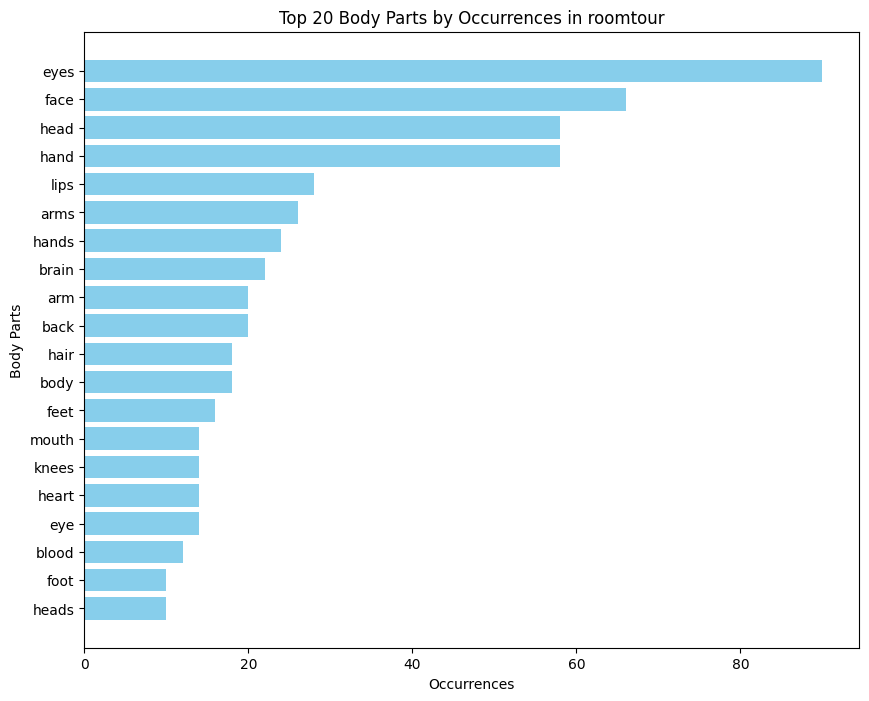

In [ ]:
import matplotlib.pyplot as plt
import os

file_path = '/content/drive/My Drive/TORI_wordnet/roomtour/top_words.txt'

# Initialize lists to store the parts of the body and their counts
body_parts = []
occurrences = []

# Read the file and extract the data
with open(file_path, 'r') as file:
    for line in file.readlines():
        # Skip the header or any empty line
        if line.strip() and 'occurrences' in line:
            part, count = line.split(':')
            body_parts.append(part.strip())
            occurrences.append(int(count.split()[0]))  # Get the number as an integer

# Create a bar graph
plt.figure(figsize=(10, 8))
plt.barh(body_parts, occurrences, color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Body Parts')
plt.title('Top 20 Body Parts by Occurrences in roomtour')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top
plt.show()
